<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/AirBnb_madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛌 Diagnostic reproductible du marché de la location en AirBnb  🏩

Clémence François, Julie Poitevin, Léa Rouxel

Ce script permet de préparer puis d'analyser les données AirBnb dans n'importe quel ville.
Il est uniquement nécessaire de modifier les liens de téléchargement récupérables sur le site : [*Inside AirBnB*](http://insideairbnb.com/get-the-data.html)

Master SIGAT 2022

## 1- Initialisation de l'environnement de travail

### Installation des librairies Python nécessaires

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!git clone https://github.com/geopandas/geopandas.git
!pip install geopandas
# Instal contextily (fonds de carte)
!pip install contextily
# Install mapclassify (cartographie thématique)
!pip install mapclassify
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Pour la cartographie interactive
!pip install folium
# Pour l'affichage d'une échelle cartographique
!pip install matplotlib_scalebar
# Install H3Index (UBER)
!pip install h3

### Importation des librairies Python

In [ ]:
import pandas as pd #Gestion de données
import matplotlib as plt #Visualisation de données
import matplotlib.pyplot as mplt #Visualisation de données 2
import geopandas as gpd #Gestion données spatiales
import pygeos #Opérations sur les géométrie de données spatiales
import contextily as ctx #Fonds de carte
import numpy as np #Manipulation de tableaux
import shapely #Manipulation de géométrie
import shapely.geometry
from shapely.geometry import LineString, Point, Polygon
import folium #Cartographie interactive
import mapclassify #Cartographie thématique
from matplotlib_scalebar.scalebar import ScaleBar #Echelle cartographique
from h3 import h3

## 2- Téléchargement et importation des différents jeux de données utilisés

### Données de proposition de location (Données : listing.csv)

In [ ]:
# Téléchargement
!wget -O Ville.csv http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-12-08/visualisations/listings.csv

In [ ]:
#Importer le CSV des locations en un dataframe (séparateur ,)

Ville = pd.read_csv("Ville.csv", sep=',')

### Données des emprises de quartiers correspondant (Données : neighbourhoods.geojson)



In [ ]:
# Téléchargement
!wget -O neighbourhoods.geojson http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-12-08/visualisations/neighbourhoods.geojson

In [ ]:
#Importer la couche des quartiers

Quartiers= gpd.read_file("neighbourhoods.geojson", encoding='utf-8')

## 3- Préparation des données

In [ ]:
# Affichage des premières lignes du dataframe Ville

Ville.head()

id                                      name    host_id host_name  \
0   6369  Rooftop terrace room ,  ensuite bathroom      13660     Simon   
1  21853                      Bright and airy room      83531     Abdel   
2  23001         Apartmento Arganzuela- Madrid Rio      82175     Jesus   
3  24805                    Gran Via Studio Madrid  346366726         A   
4  26825        Single Room whith private Bathroom     114340  Agustina   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0           Chamartín  Hispanoamérica  40.45724   -3.67688     Private room   
1              Latina        Cármenes  40.40381   -3.74130     Private room   
2          Arganzuela         Legazpi  40.38840   -3.69511  Entire home/apt   
3              Centro     Universidad  40.42183   -3.70529  Entire home/apt   
4          Arganzuela         Legazpi  40.38975   -3.69018     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     59               1                 81  2021-11-20               0.57   
1     31               4                 33  2018-07-15               0.38   
2     50              15                  0         NaN                NaN   
3     92               5                 14  2021-11-29               0.16   
4     29               2                154  2021-11-28               1.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               149                      3   
1                               2               131                      0   
2                               6               311                      0   
3                               1               167                      4   
4                               1               344                      5   

  license                   geometry  
0     NaN  POINT (-3.67688 40.45724)  
1     NaN  POINT (-3.74130 40.40381)  
2     NaN  POINT (-3.69511 40.38840)  
3     NaN  POINT (-3.70529 40.42183)  
4     NaN  POINT (-3.69018 40.38975)

In [ ]:
# Vérification du nombre de lignes et de colonnes dans le dataframe Ville

Ville.shape

(17831, 19)

In [ ]:
#Transformation du Dataframe Ville en un GeoDataframe

VilleGeom = gpd.GeoDataFrame(Ville, crs = 'epsg:4326', geometry=gpd.points_from_xy(Ville.longitude, Ville.latitude))
VilleGeom.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Affichage d'une première analyse catégorisant les biens à la location AirBnb en fonction de leur type

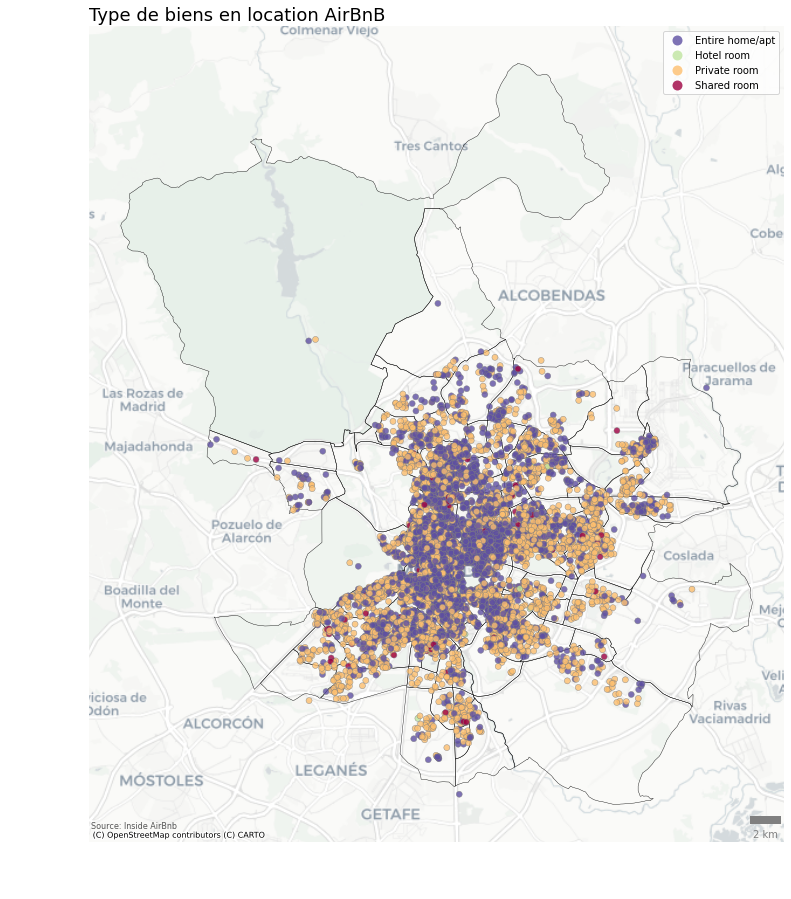

In [ ]:
#Carte des biens en fonction de leur type 

Carte1, ax = plt.pyplot.subplots(figsize=(15,15)) # Définition de l'interface d'accueil de la carte

Quartiers.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.4, color = 'black') # Affichage des contours des quartiers
#Affichage des biens catégorisés
VilleGeom.to_crs('EPSG:3857').plot(ax=ax, zorder=3, column = "room_type", linewidth=0.5, cmap='Spectral_r', alpha= 0.8, edgecolor='grey', legend=True)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # Affichage d'un fond de carte

ax.axis("off") # Suppression de l'affichage des objets axes

# Création d'un objet annotation pour ajouter une source à la carte
ax.annotate('Source: Inside AirBnb',xy=(0.115, 0.087), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')

plt.pyplot.title('Type de biens en location AirBnB', loc='left', fontsize=18) # Affichage d'un titre

# Ajout d'une échelle cartographique
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

#plt.pyplot.show() # Affichage de la carte finale

Text(0.5, 1.0, 'Nombre de biens en location AirBnb en fonction de leur type')

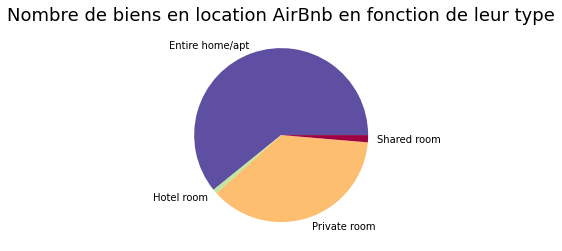

In [ ]:
# Préparation d'un dataframe qui regrouper les locations par catégorie de biens (GROUP BY)

Categorie = Ville[["room_type", "id"]].groupby("room_type").count() # Mise en place du nouveau dataframe
Categorie = Categorie.sort_values("room_type", ascending=True) # Réorganisation du dataframe trié par ordre alphabétique

# Affichage d'un diagramme circulaire du nombre de biens par type

Categorie.plot.pie(y="id", ylabel="", legend=False, cmap='Spectral_r') # Construction du diagramme
plt.pyplot.title("Nombre de biens en location AirBnb en fonction de leur type", fontsize=18) # Ajout d'un titre au diagramme
# Categorie.head() # Affichage au besoin du tableau correspondant

### Mise en place de graphiques de pré-analyse des locations en AirBnb

#### Fréquence des prix (par nuitée) des biens à la location en AirBnb

Text(0.5, 0, 'Prix par nuitée')

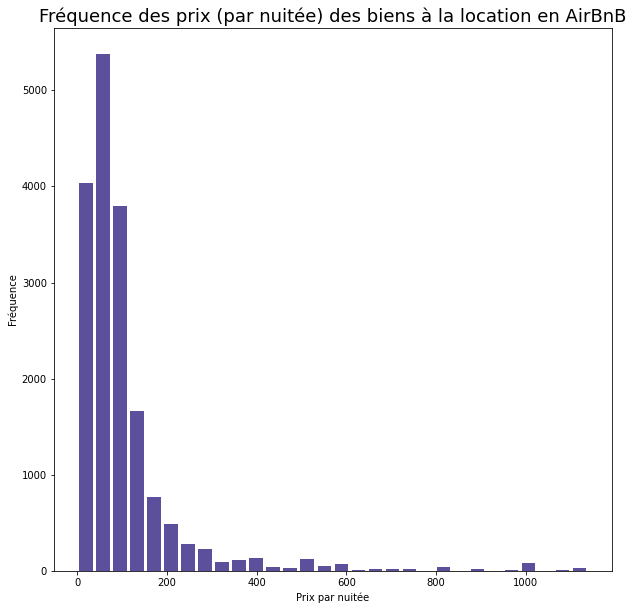

In [ ]:
# Suppression des valeurs aberrantes en ôtant le dernier centile
Villeprice = Ville[(Ville["price"] <= Ville.quantile(q=0.99)["price"])]

# Construction de l'histogramme des locations par prix
Villeprice.plot.hist(y='price', figsize=(10, 10), bins= 30, color = '#5C509D', rwidth=0.8, legend=False)

# Ajout d'un titre et d'un label à chaque axe
plt.pyplot.title("Fréquence des prix (par nuitée) des biens à la location en AirBnB", fontsize=18)
plt.pyplot.ylabel("Fréquence")
plt.pyplot.xlabel("Prix par nuitée")

#### Moyenne des prix (par nuitée) par type de biens

Text(0.5, 0, 'Type de biens')

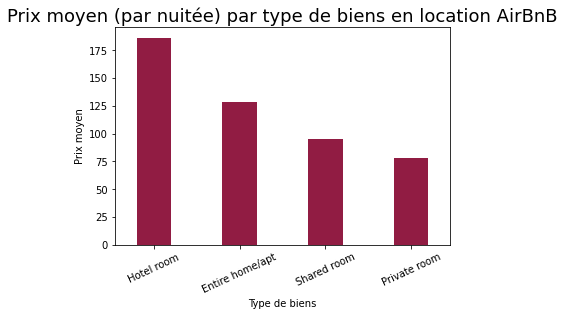

In [ ]:
# Préparation d'un dataframe qui moyenne les prix des biens par leur type (GROUP BY)
Moyprice = Villeprice[["room_type", "price"]].groupby("room_type").mean()
Moyprice = Moyprice.sort_values("price", ascending=False) # Réorganisation du dataframe par prix décroissant

# Affichage d'un graphique en bar de la moyenne des prix par type
Moyprice.plot(kind='bar', legend=False, color='#911C43', rot=25, width=0.4)

# Ajout d'un titre et d'un label pour chaque axe
plt.pyplot.title("Prix moyen (par nuitée) par type de biens en location AirBnB", fontsize=18)
plt.pyplot.ylabel("Prix moyen")
plt.pyplot.xlabel("Type de biens")

# Moyprice.head() # Affichage au besoin du tableau correspondant

## 4- Analyse des besoins en location agrégés dans un carroyage de 100 carreaux

In [ ]:
# Transformation du dataframe des prix propres en geodataframe

VillepriceGeom = gpd.GeoDataFrame(Villeprice, crs = 'epsg:4326', geometry=gpd.points_from_xy(Villeprice.longitude, Villeprice.latitude))

(-3.8508202927517727,
 -3.5302738522127792,
 40.305787311867356,
 40.547203461339656)

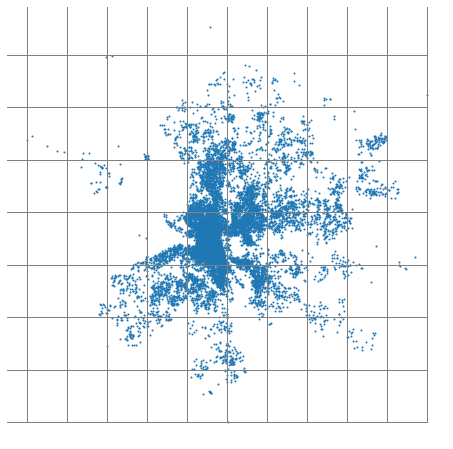

In [ ]:
# Définir l'emprise de la grille
xmin, ymin, xmax, ymax= VillepriceGeom.total_bounds

# Paramétrer le nombre de cellules
n_cells=10
cell_size = (xmax-xmin)/n_cells

# Création des cellules
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs='EPSG:4326').reset_index()


# Cartographie pour contrôler
ax = VillepriceGeom.plot(markersize=1, figsize=(12, 8))
plt.pyplot.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [ ]:
#Jointure spatiale VillepriceGeom<>Grille

Etape1 = gpd.sjoin(VillepriceGeom, cell, how='left', op='within')
Etape1.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


id                                      name  host_id host_name  \
0   6369  Rooftop terrace room ,  ensuite bathroom    13660     Simon   
1  21853                      Bright and airy room    83531     Abdel   
2  23001         Apartmento Arganzuela- Madrid Rio    82175     Jesus   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0           Chamartín  Hispanoamérica  40.45724   -3.67688     Private room   
1              Latina        Cármenes  40.40381   -3.74130     Private room   
2          Arganzuela         Legazpi  40.38840   -3.69511  Entire home/apt   

   price  ...  number_of_reviews  last_review reviews_per_month  \
0     59  ...                 81   2021-11-20              0.57   
1     31  ...                 33   2018-07-15              0.38   
2     50  ...                  0          NaN               NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               149                      3   
1                               2               131                      0   
2                               6               311                      0   

   license                   geometry index_right  index  
0      NaN  POINT (-3.67688 40.45724)        58.0   58.0  
1      NaN  POINT (-3.74130 40.40381)        38.0   38.0  
2      NaN  POINT (-3.69511 40.38840)        47.0   47.0  

[3 rows x 21 columns]

#### Agrégation des données pour carte du nombre de biens par carreaux

In [ ]:
# Préparation d'un dataframe qui compte le nombre de biens (id) dans les carreaux (index_right) (GROUP BY)
Etape2 = Etape1[["index_right", "id"]].groupby("index_right").count()
Etape2 = Etape2.sort_values("id", ascending=False) 
Etape2.head()

id
index_right      
48.0         9026
57.0         1327
49.0         1275
47.0          940
58.0          752

In [ ]:
# Faire la jointure attributaire

Etape3 = Etape2.merge(cell, left_on='index_right', right_on='index')
Etape3.rename(columns={'id': 'Nb'}, inplace=True)
Etape3 = gpd.GeoDataFrame(Etape3, geometry='geometry')
Etape3.head()

Nb  index                                           geometry
0  9026     48  POLYGON ((-3.71969 40.40418, -3.71969 40.43332...
1  1327     57  POLYGON ((-3.69055 40.40418, -3.69055 40.43332...
2  1275     49  POLYGON ((-3.71969 40.43332, -3.71969 40.46246...
3   940     47  POLYGON ((-3.71969 40.37504, -3.71969 40.40418...
4   752     58  POLYGON ((-3.69055 40.43332, -3.69055 40.46246...

Text(0.5, 0, 'Nombre de biens')

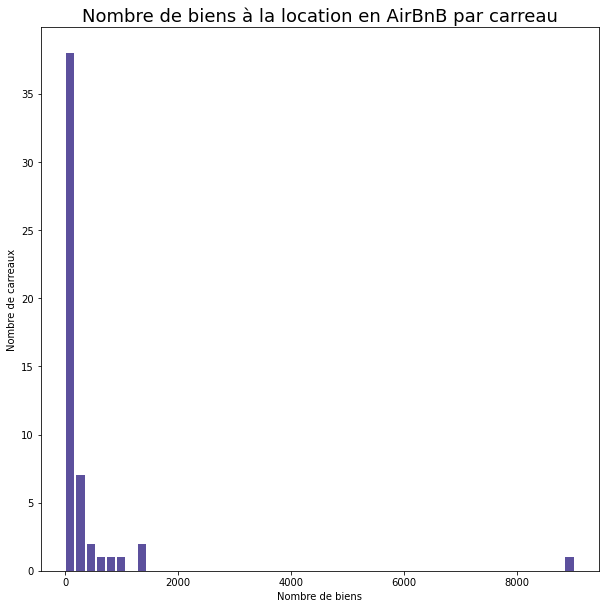

In [ ]:
Etape3["Nb"].plot.hist(bins=50, figsize=(10, 10), color = '#5C509D', rwidth=0.8, legend=False)

# Ajout d'un titre et d'un label à chaque axe
plt.pyplot.title("Nombre de biens à la location en AirBnB par carreaux", fontsize=18)
plt.pyplot.ylabel("Nombre de carreaux")
plt.pyplot.xlabel("Nombre de biens")

In [ ]:
#Verification somme

total1 = VillepriceGeom['id'].count()
total2 = Etape3['Nb'].sum()

print(total1)
print(total2)

17670
17667


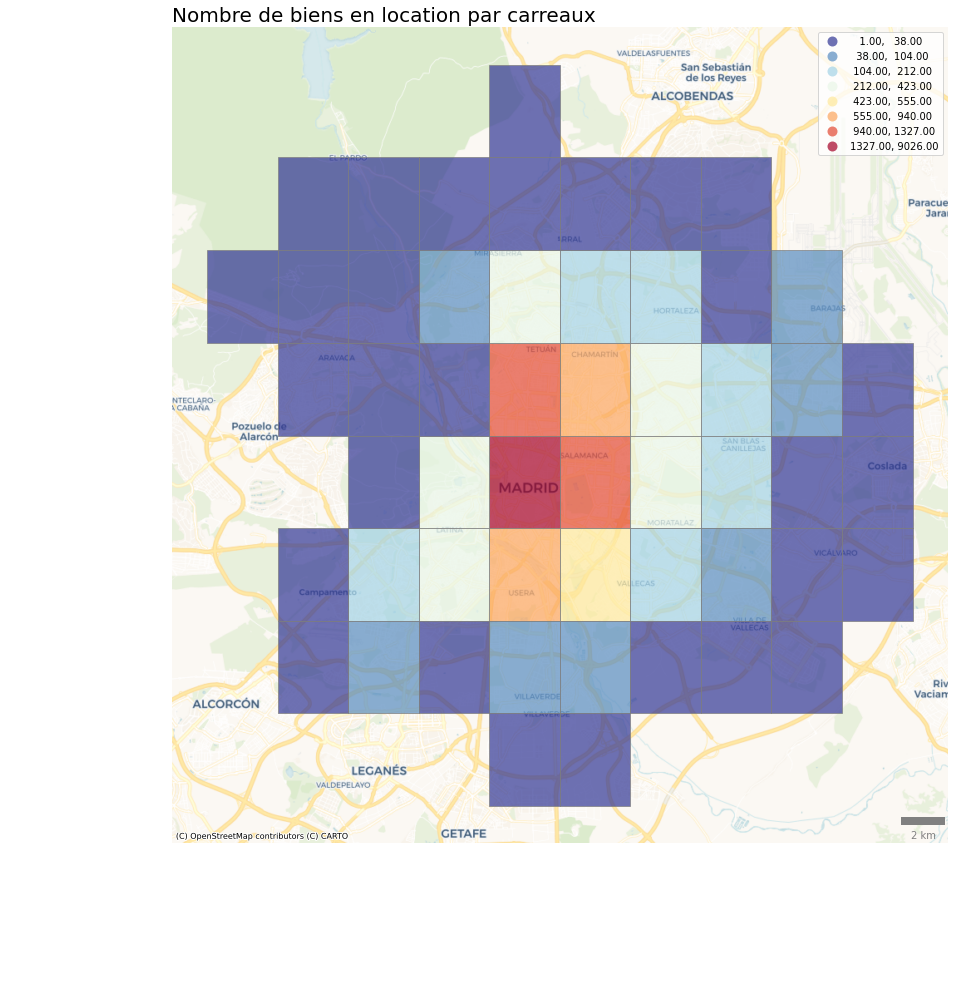

In [ ]:
#Cartographie du carroyage

NbBiens, ax = plt.pyplot.subplots(figsize=(15,15))
Etape3.to_crs('EPSG:3857').plot(ax=ax, column='Nb', figsize=(12, 8), k=8, cmap='RdYlBu_r', scheme='FisherJenks', edgecolor="grey", alpha=0.7, legend = 'true')
#Quartiers.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black') # Affichage des contours des quartiers
ax.axis("off")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)
plt.pyplot.title("Nombre de biens en location par carreaux", loc='left', fontsize=20)

# Création d'un objet annotation pour ajouter une source à la carte
ax.annotate('Source: Inside AirBnb',xy=(0.8, 0.087), xycoords='figure pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')

# Ajout d'une échelle cartographique
ax.add_artist(ScaleBar(1, length_fraction=0.1, location = "lower right", box_alpha=0, color="grey"))

plt.pyplot.show()

#### Agrégation des données par prix moyens par carreaux

In [ ]:
# Agrégation statistique
Etape4 = Etape1.dissolve(by="index_right", aggfunc="mean")
Etape4.head(3)

geometry            id  \
index_right                                                                    
14.0         MULTIPOINT (-3.83263 40.47554, -3.82194 40.470...  3.693776e+07   
19.0                                 POINT (-3.77827 40.35870)  5.339191e+07   
20.0         MULTIPOINT (-3.78363 40.37678, -3.78337 40.376...  3.470685e+07   

                  host_id   latitude  longitude  price  minimum_nights  \
index_right                                                              
14.0         1.167805e+08  40.469783  -3.819600  109.0        3.250000   
19.0         3.530899e+08  40.358700  -3.778270   15.0        1.000000   
20.0         1.797428e+08  40.379333  -3.781651   34.5        2.333333   

             number_of_reviews  reviews_per_month  \
index_right                                         
14.0                       3.5           0.122500   
19.0                       0.0                NaN   
20.0                      11.5           0.588889   

             calculated_host_listings_count  availability_365  \
index_right                                                     
14.0                                   1.00        102.750000   
19.0                                   1.00        355.000000   
20.0                                   1.25        202.083333   

             number_of_reviews_ltm  index  
index_right                                
14.0                          0.50   14.0  
19.0                          0.00   19.0  
20.0                          0.25   20.0

In [ ]:
# Enrichissement du carroyage
cell.loc[Etape4.index, 'price']=Etape4.price.values
del Etape4
cell.head()

index                                           geometry  price
0      0  POLYGON ((-3.86539 40.31676, -3.86539 40.34590...    NaN
1      1  POLYGON ((-3.86539 40.34590, -3.86539 40.37504...    NaN
2      2  POLYGON ((-3.86539 40.37504, -3.86539 40.40418...    NaN
3      3  POLYGON ((-3.86539 40.40418, -3.86539 40.43332...    NaN
4      4  POLYGON ((-3.86539 40.43332, -3.86539 40.46246...    NaN

Text(0.5, 0, 'Prix moyen par nuitée')

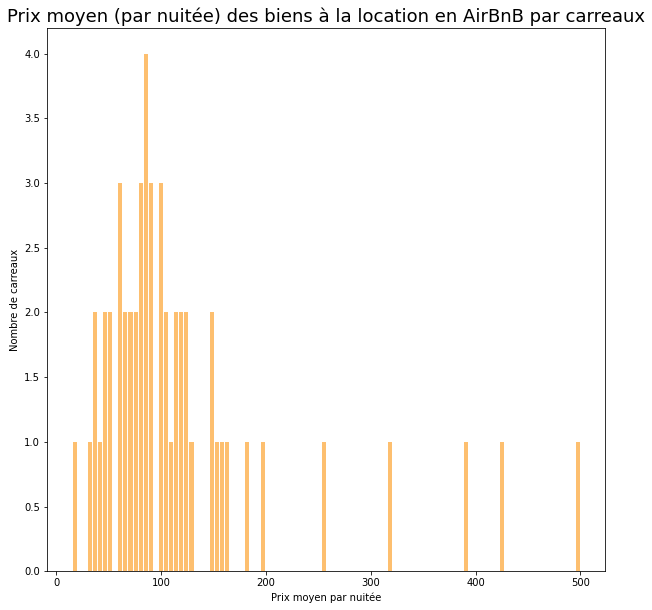

In [ ]:
cell["price"].plot.hist(bins=100, figsize=(10, 10), color = '#FDBF6F', rwidth=0.8, legend=False)

# Ajout d'un titre et d'un label à chaque axe
plt.pyplot.title("Prix moyen (par nuitée) des biens à la location en AirBnB par carreaux", fontsize=18)
plt.pyplot.ylabel("Nombre de carreaux")
plt.pyplot.xlabel("Prix moyen par nuitée")

In [ ]:
#Verification somme

total3 = VillepriceGeom['price'].mean()
total4 = cell['price'].mean()

print(total3)
print(total4)

109.69298245614036
119.02162274440812


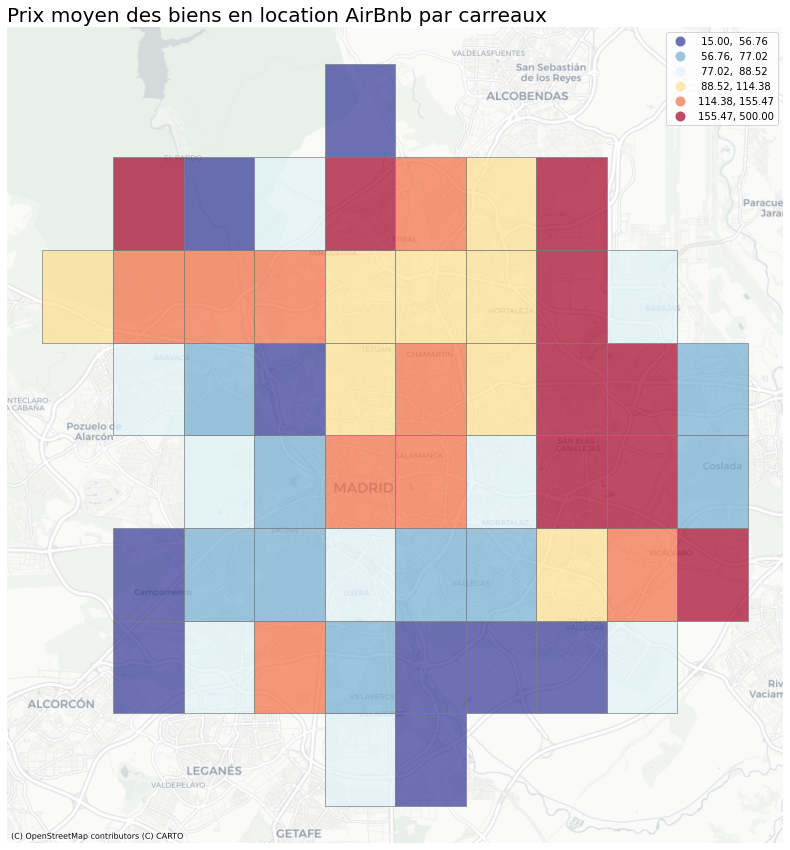

In [ ]:
#Cartographie du carroyage

PrixMoy, ax = plt.pyplot.subplots(figsize=(15,15))
cell.to_crs('EPSG:3857').plot(ax=ax, column='price', figsize=(12, 8), k=6, cmap='RdYlBu_r', scheme='quantiles', edgecolor="grey", alpha=0.7, legend = 'true')
#Quartiers.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black') # Affichage des contours des quartiers
ax.axis("off")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.pyplot.title("Prix moyen des biens en location AirBnb par carreaux", loc='left', fontsize=20)
plt.pyplot.show()

In [ ]:
#Création d'un maillage hexagonal (selon la résolution H3 de Uber)

h3_level = 9 # soit 0,1 km²
 
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
      row.geometry.y, row.geometry.x, h3_level)
 
VillepriceGeom['h3'] = VillepriceGeom.apply(lat_lng_to_h3, axis=1)

In [ ]:
#Comptage du nombre de biens à la location AirBnB par hexagone

counts = VillepriceGeom.groupby(['h3']).h3.agg('count').to_frame('count').reset_index()
counts.head()

h3  count
0  89390ca0003ffff      3
1  89390ca0007ffff      1
2  89390ca000bffff      1
3  89390ca0013ffff      2
4  89390ca0017ffff      1

Text(0.5, 0, 'Nombre de biens')

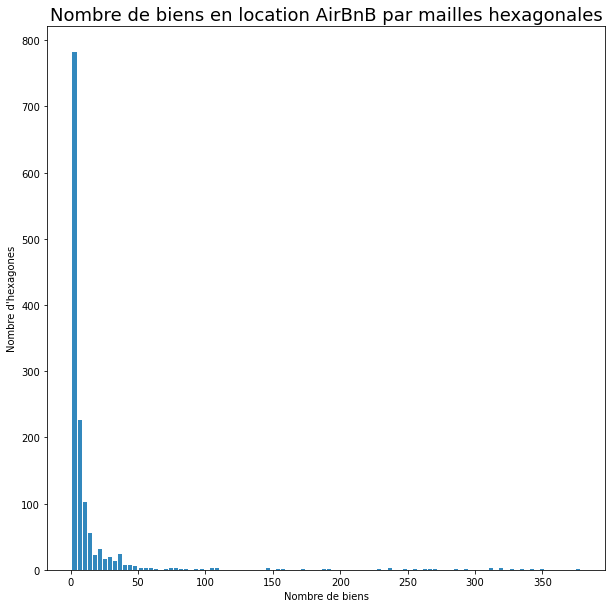

In [ ]:
#Création d'un histogramme relatif au nombre de biens à la location AirBnB par hexagone
counts.plot.hist(bins=100, figsize=(10, 10), color = '#3288bd', rwidth=0.8, legend=False)

# Ajout d'un titre et d'un label à chaque axe
plt.pyplot.title("Nombre de biens en location AirBnB par mailles hexagonales", fontsize=18)
plt.pyplot.ylabel("Nombre d'hexagones")
plt.pyplot.xlabel("Nombre de biens")


In [ ]:
#Nombre d'hexagones
counts["h3"].size

1364

In [ ]:
#Verification somme

total5 = VillepriceGeom['id'].size
total6 = counts['count'].sum()

print(total5)
print(total6)

17670
17670


h3  count                                           geometry
0  89390ca0003ffff      3  POLYGON ((-3.61807 40.37439, -3.61983 40.37318...
1  89390ca0007ffff      1  POLYGON ((-3.61408 40.37497, -3.61584 40.37376...
2  89390ca000bffff      1  POLYGON ((-3.61937 40.37132, -3.62113 40.37011...
3  89390ca0013ffff      2  POLYGON ((-3.62077 40.37688, -3.62253 40.37566...
4  89390ca0017ffff      1  POLYGON ((-3.61678 40.37746, -3.61854 40.37624...

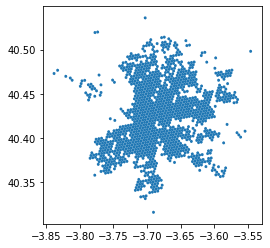

In [ ]:
# Création de la géométrie pour le maillage hexagonal

def add_geometry(row):
    points = h3.h3_to_geo_boundary(
      row['h3'], True)
    return Polygon(points)
 
counts['geometry'] = counts.apply(add_geometry, axis=1)
Mailage = gpd.GeoDataFrame(counts, crs='EPSG:4326')
Mailage.plot()
Mailage.head()

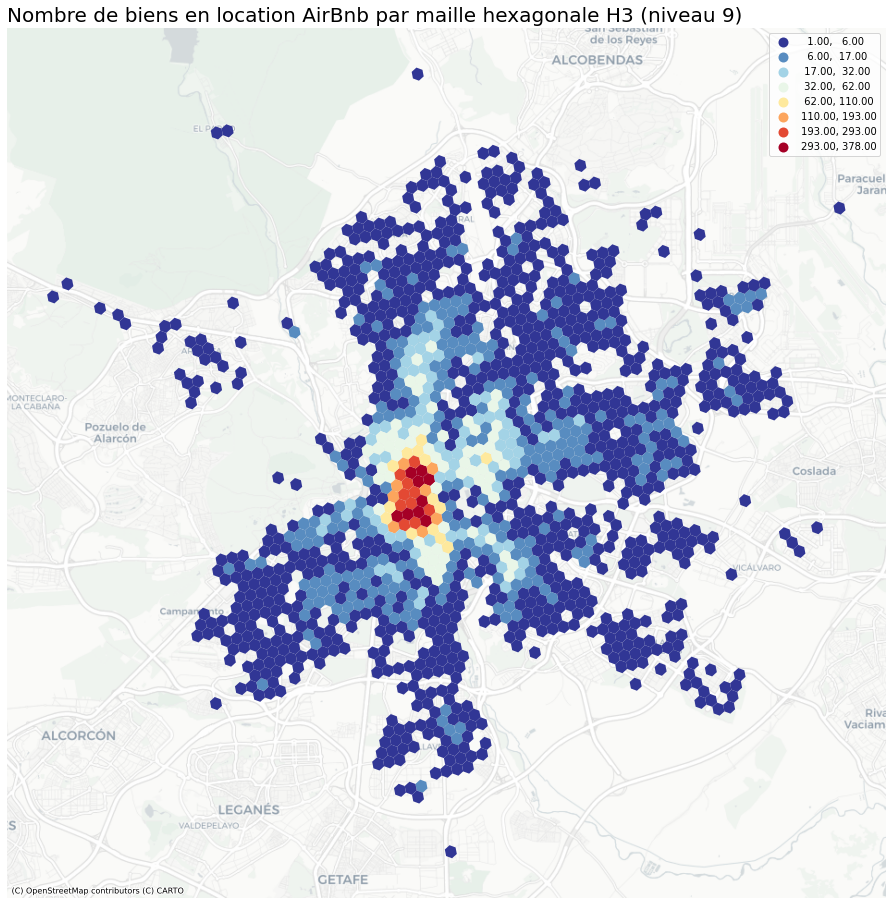

In [ ]:
# Cartographie

H3Map, ax = plt.pyplot.subplots(figsize=(18,16))
Mailage.to_crs('EPSG:3857').plot(ax=ax, column='count', figsize=(15, 10),k=8, cmap='RdYlBu_r', scheme='FisherJenks', legend=True)
#Quartiers.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black') # Affichage des contours des quartiers
ax.axis("off")
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
plt.pyplot.title("Nombre de biens en location AirBnb par maille hexagonale H3 (niveau 9)", loc='left', fontsize=20)
plt.pyplot.show()

In [ ]:
#Prix moyen des biens en location AirBnB par maille hexagonale

means = VillepriceGeom.groupby(['h3'])['price'].mean().to_frame('mean').reset_index()
means.head()

h3   mean
0  89390ca0003ffff   38.0
1  89390ca0007ffff  110.0
2  89390ca000bffff   24.0
3  89390ca0013ffff   39.0
4  89390ca0017ffff   35.0

Text(0.5, 0, 'Prix moyen')

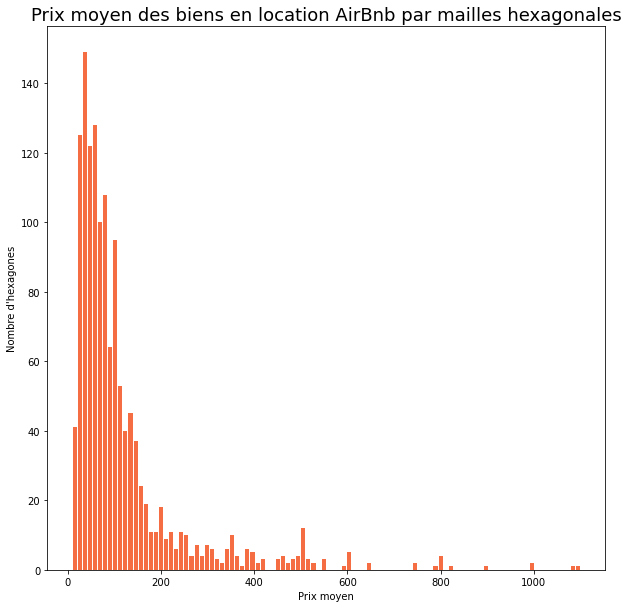

In [ ]:
#Création d'un histogramme relatif au nombre de biens à la location AirBnB par hexagone
means.plot.hist(bins=100, figsize=(10, 10), color = '#f46d43', rwidth=0.8, legend=False)

# Ajout d'un titre et d'un label à chaque axe
plt.pyplot.title("Prix moyen des biens en location AirBnb par mailles hexagonales", fontsize=18)
plt.pyplot.ylabel("Nombre d'hexagones")
plt.pyplot.xlabel("Prix moyen")


In [ ]:
#Verification somme

total7 = VillepriceGeom['price'].mean()
total8 = means['mean'].mean()

print(total7)
print(total8)

109.69298245614036
116.51230164500669


h3   mean                                           geometry
0  89390ca0003ffff   38.0  POLYGON ((-3.61807 40.37439, -3.61983 40.37318...
1  89390ca0007ffff  110.0  POLYGON ((-3.61408 40.37497, -3.61584 40.37376...
2  89390ca000bffff   24.0  POLYGON ((-3.61937 40.37132, -3.62113 40.37011...
3  89390ca0013ffff   39.0  POLYGON ((-3.62077 40.37688, -3.62253 40.37566...
4  89390ca0017ffff   35.0  POLYGON ((-3.61678 40.37746, -3.61854 40.37624...

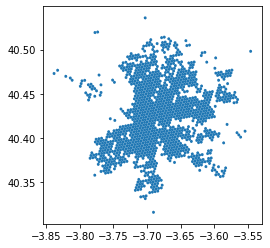

In [ ]:
# Ajout de la géométrie du maillage hexagonal
 
means['geometry'] = means.apply(add_geometry, axis=1)
Mailages = gpd.GeoDataFrame(means, crs='EPSG:4326')
Mailages.plot()
Mailages.head()

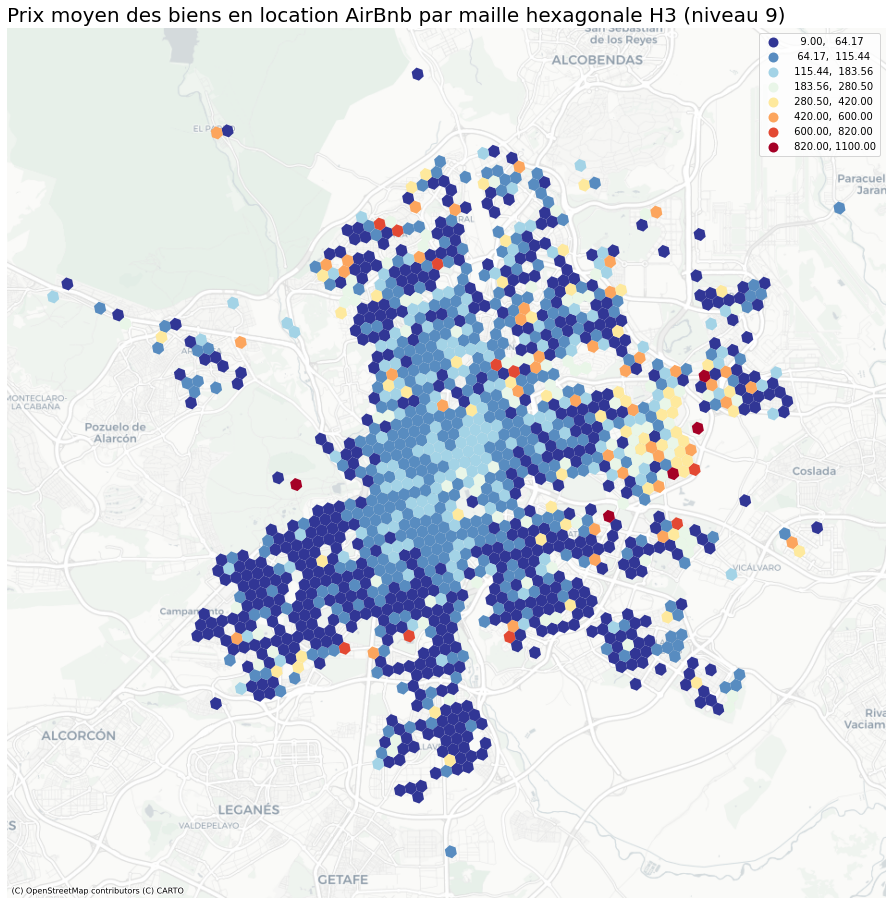

In [ ]:
# Cartographie

H3Map, ax = plt.pyplot.subplots(figsize=(18,16))
Mailages.to_crs('EPSG:3857').plot(ax=ax, column='mean', figsize=(15, 10),k=8, cmap='RdYlBu_r', scheme='FisherJenks', legend=True)
#Quartiers.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black') # Affichage des contours des quartiers
ax.axis("off")
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
plt.pyplot.title("Prix moyen des biens en location AirBnb par maille hexagonale H3 (niveau 9)", loc='left', fontsize=20)
plt.pyplot.show()

In [ ]:
VillepriceGeom.head()

id                                      name    host_id host_name  \
0   6369  Rooftop terrace room ,  ensuite bathroom      13660     Simon   
1  21853                      Bright and airy room      83531     Abdel   
2  23001         Apartmento Arganzuela- Madrid Rio      82175     Jesus   
3  24805                    Gran Via Studio Madrid  346366726         A   
4  26825        Single Room whith private Bathroom     114340  Agustina   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0           Chamartín  Hispanoamérica  40.45724   -3.67688     Private room   
1              Latina        Cármenes  40.40381   -3.74130     Private room   
2          Arganzuela         Legazpi  40.38840   -3.69511  Entire home/apt   
3              Centro     Universidad  40.42183   -3.70529  Entire home/apt   
4          Arganzuela         Legazpi  40.38975   -3.69018     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     59               1                 81  2021-11-20               0.57   
1     31               4                 33  2018-07-15               0.38   
2     50              15                  0         NaN                NaN   
3     92               5                 14  2021-11-29               0.16   
4     29               2                154  2021-11-28               1.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               149                      3   
1                               2               131                      0   
2                               6               311                      0   
3                               1               167                      4   
4                               1               344                      5   

  license                   geometry               h3  
0     NaN  POINT (-3.67688 40.45724)  89390cb0a67ffff  
1     NaN  POINT (-3.74130 40.40381)  89390cba987ffff  
2     NaN  POINT (-3.69511 40.38840)  89390ca308fffff  
3     NaN  POINT (-3.70529 40.42183)  89390cb1b13ffff  
4     NaN  POINT (-3.69018 40.38975)  89390ca30bbffff

In [ ]:
#Prix moyen des biens en location AirBnB par maille hexagonale

count_type = VillepriceGeom.groupby(['h3','room_type'])['id'].count().to_frame('count').reset_index()
count_type.head()

h3        room_type  count
0  89390ca0003ffff  Entire home/apt      1
1  89390ca0003ffff     Private room      2
2  89390ca0007ffff  Entire home/apt      1
3  89390ca000bffff     Private room      1
4  89390ca0013ffff     Private room      2

In [ ]:
#test
count_type_large = pd.pivot_table(count_type, values="count", index=["h3"], columns="room_type")
maxValueIndex = count_type_large.idxmax(axis = 1) 
maxValueIndex = maxValueIndex.to_frame().reset_index()
maxValueIndex.rename(columns={0: 'Type'}, inplace=True)
maxValueIndex.head(20)

h3             Type
0   89390ca0003ffff     Private room
1   89390ca0007ffff  Entire home/apt
2   89390ca000bffff     Private room
3   89390ca0013ffff     Private room
4   89390ca0017ffff     Private room
5   89390ca001bffff     Private room
6   89390ca0023ffff  Entire home/apt
7   89390ca0033ffff     Private room
8   89390ca0037ffff  Entire home/apt
9   89390ca004fffff     Private room
10  89390ca0053ffff     Private room
11  89390ca0057ffff     Private room
12  89390ca0077ffff     Private room
13  89390ca0083ffff     Private room
14  89390ca0087ffff  Entire home/apt
15  89390ca008bffff  Entire home/apt
16  89390ca0093ffff     Private room
17  89390ca009bffff  Entire home/apt
18  89390ca00afffff  Entire home/apt
19  89390ca00b7ffff     Private room

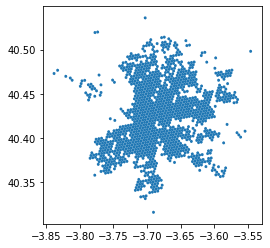

In [ ]:
# Ajout de la géométrie du maillage hexagonal
 
maxValueIndex['geometry'] = maxValueIndex.apply(add_geometry, axis=1)
maxValueIndexGeom = gpd.GeoDataFrame(maxValueIndex, crs='EPSG:4326')
maxValueIndexGeom.plot()

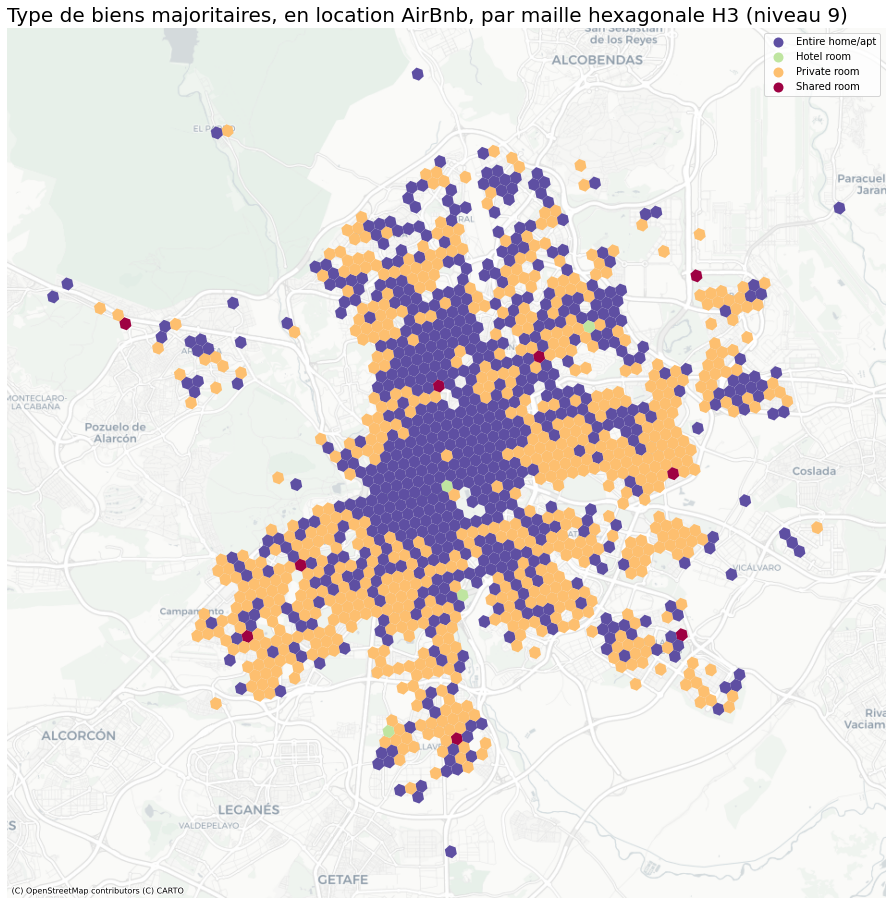

In [ ]:
# Cartographie - Type de biens majoritaires, en location AirBnb, par maille hexagonale H3 (niveau 9)

TypeMap, ax = plt.pyplot.subplots(figsize=(18,16))
maxValueIndexGeom.to_crs('EPSG:3857').plot(ax=ax, column='Type', figsize=(15, 10), cmap='Spectral_r', legend=True)
#Quartiers.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black') # Affichage des contours des quartiers
ax.axis("off")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.pyplot.title("Type de biens majoritaires, en location AirBnb, par maille hexagonale H3 (niveau 9)", loc='left', fontsize=20)
plt.pyplot.show()